In [1]:
import boto3
import pandas as pd
import numpy as np

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'Demos/CarPrice_Assignment.csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
car_price = pd.read_csv(file_content_stream)
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [3]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
car_price.shape

(205, 26)

In [39]:
## Defining the input and target variable 
X = car_price[['wheelbase', 'enginesize', 'horsepower', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg']]
Y = car_price['price']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

## Performing variable select with LASSO
lasso_cv = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 10], normalize = True, cv = 5).fit(X_train, Y_train)

## Extracting the optimal alpha
cv_alpha = lasso_cv.alpha_

## Variable selecting with LASSO
lasso_md = Lasso(alpha = cv_alpha, normalize = True).fit(X_train, Y_train)
lasso_md.coef_

array([ 194.53567074,  107.8933204 ,   47.45767743,  241.15075446,
          1.78003022, -103.2072616 ,   -0.        ])

In [40]:
## Dropping highwaympg
X_train = X_train.drop(columns = ['highwaympg'], axis = 1)
X_test = X_test.drop(columns = ['highwaympg'], axis = 1)

In [ ]:
## 

In [10]:
X_train.shape

(164, 7)

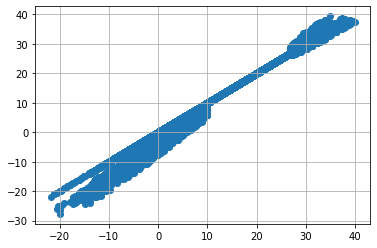

In [4]:
plt.scatter(weather['Temperature (C)'], weather['Apparent Temperature (C)'])
plt.grid()
plt.show()

In [ ]:
## Defining the input and target variables
X1 = weather[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
Y = weather['Apparent Temperature (C)']

## Importing LASSO and LASSOCV
from sklearn.liner_model import Lasso, LassoCV

lasso_CV = LassoCV()